In [1]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

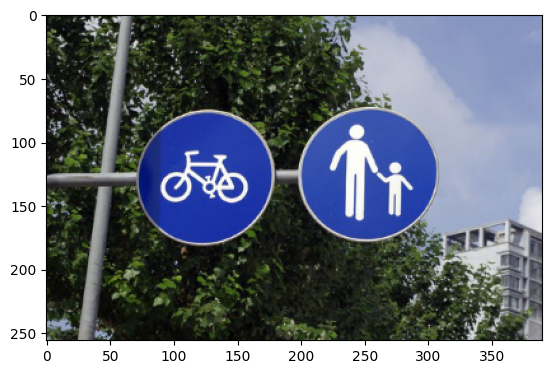

In [23]:
I = plt.imread('test_sobel.png')
plt.imshow(I)

In [12]:
if I.ndim == 3:
    I = np.dot(I[...,:3],[0.2989,0.587,0.114])


In [16]:
Gx = np.array([[-1,0,1],
                [-2,0,0],
                [-1,0,1]])

Gy = np.array([[-1,-2,-1],
               [0,0,0],
               [1,2,1]])

In [19]:
def convolved2d(image,kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1

    output = np.zeros((output_height,output_width))

    for i in range(output_height):
        for j in range(output_width):
            output[i,j] = np.sum(image[i:i+kernel_height,j:j+kernel_width]*kernel)

    return output    

In [20]:
Ix = convolved2d(I,Gx)
Iy = convolved2d(I,Gy)

In [21]:
G = np.hypot(Ix,Iy)
G = (G/G.max()) * 255

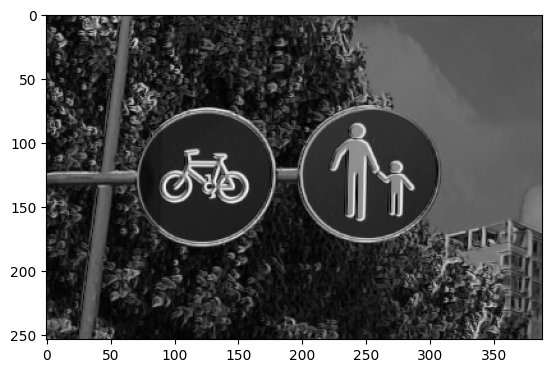

In [22]:
plt.imshow(G,cmap = 'gray')
plt.show()

$ùëÖ= det(ùëÄ)‚àíùëò*(trace(ùëÄ))^2$


$det(M)=I_x^2 * I_y^2 -(I_xI_y)^2$

$ trace(M) = I_x^2 + I_y^2$

In [28]:
Ixx = Ix * Ix
Iyy = Iy * Iy
Ixy = Ix * Iy

 ËøôÈáå‰ΩøÁî®‰∫ÜÈ´òÊñØÂπ≥ÊªëÔºåÁõÆÁöÑÂèØËÉΩÊòØÊ∂àÈô§Âô™Â£∞ÔºåÊèêÈ´òËßíÁÇπÊ£ÄÊµãÁöÑÈ≤ÅÊ£íÊÄß

In [29]:
# –ì–∞—É—Å—Å–æ–≤–æ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ
sigma = 1.5
Sxx = ndimage.gaussian_filter(Ixx,sigma)
Syy = ndimage.gaussian_filter(Iyy,sigma)
Sxy = ndimage.gaussian_filter(Ixy,sigma)

In [30]:
# –ö—Ä–∏—Ç–µ—Ä–∏–π –•–∞—Ä—Ä–∏—Å–∞
k = 0.05
R = (Sxx*Syy-Sxy**2) - k* (Sxx+Syy) ** 2
R

array([[ 0.00056026,  0.00119378,  0.00246253, ..., -0.09349272,
        -0.09440682, -0.09498563],
       [ 0.000797  ,  0.00169   ,  0.00328721, ..., -0.09442137,
        -0.09529458, -0.09584652],
       [ 0.00094508,  0.00190497,  0.00339562, ..., -0.09600225,
        -0.09665699, -0.09708565],
       ...,
       [ 0.10515865,  0.11041432,  0.09732922, ..., -0.09263726,
        -0.10673472, -0.11649697],
       [ 0.14101688,  0.13669776,  0.10417656, ..., -0.09793153,
        -0.11094809, -0.11950106],
       [ 0.15684078,  0.13443168,  0.07864163, ..., -0.10105911,
        -0.1138662 , -0.1222475 ]])

–ü–æ—Ä–æ–≥ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è —Ä–∞–∑–ª–∏—á–µ–Ω–∏—è —É–≥–ª–æ–≤—ã—Ö —Ç–æ—á–µ–∫ –∏ –Ω–µ—É–≥–ª–æ–≤—ã—Ö. –ù–∞—á–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥ —É—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ—Ç—Å—è –∫–∞–∫ 0,01 √ó R.max(), —Ç–æ –µ—Å—Ç—å 1% –æ—Ç –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –º–∞—Ç—Ä–∏—Ü—ã –æ—Ç–∫–ª–∏–∫–∞ R, –æ–¥–Ω–∞–∫–æ –¥–ª—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π —Å–ª–µ–¥—É–µ—Ç –ø—Ä–∏–º–µ–Ω—è—Ç—å —Ä–∞–∑–Ω—ã–µ –ø–æ—Ä–æ–≥–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, –Ω–∞ –¥–∞–Ω–Ω–æ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –ø–æ—Ä–æ–≥–∞ 0,01 √ó R.max() –±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å —Ñ–æ–Ω–∞ —Ç–∞–∫–∂–µ –±—É–¥–µ—Ç —Ä–∞—Å–ø–æ–∑–Ω–∞–Ω–∞ –∫–∞–∫ —É–≥–ª–æ–≤—ã–µ —Ç–æ—á–∫–∏. –£–≤–µ–ª–∏—á–µ–Ω–∏–µ –ø–æ—Ä–æ–≥–∞ –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ–≥—Ä–∞–Ω–∏—á–∏—Ç—å —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–µ–º—ã–µ —É–≥–ª–æ–≤—ã–µ —Ç–æ—á–∫–∏ –æ–±–ª–∞—Å—Ç—å—é —É–∫–∞–∑–∞—Ç–µ–ª–µ–π. –û–¥–Ω–∞–∫–æ,—á–∞—Å—Ç—å —É–∫–∞–∑–∞—Ç–µ–ª—è –¥–ª—è –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤ –±—ã–ª–∞ —Ö–æ—Ä–æ—à–æ —Ä–∞—Å–ø–æ–∑–Ω–∞–Ω–∞, –Ω–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–≥–ª–æ–≤—ã—Ö —Ç–æ—á–µ–∫ –≤ –æ–±–ª–∞—Å—Ç–∏ –ø–µ—à–µ—Ö–æ–¥–æ–≤ –±—ã–ª–æ –Ω–µ–≤–µ–ª–∏–∫–æ.

In [43]:
# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –∏ –ø–æ—Ä–æ–≥–æ–≤–∞—è –æ–±—Ä–∞–±–æ—Ç–∫–∞
R = (R / R.max()) * 255
threshold = 0.2 * R.max()
corners = np.argwhere(R>threshold)
corners

array([[  1,  40],
       [  2,  38],
       [  2,  39],
       ...,
       [227, 348],
       [227, 349],
       [227, 350]])

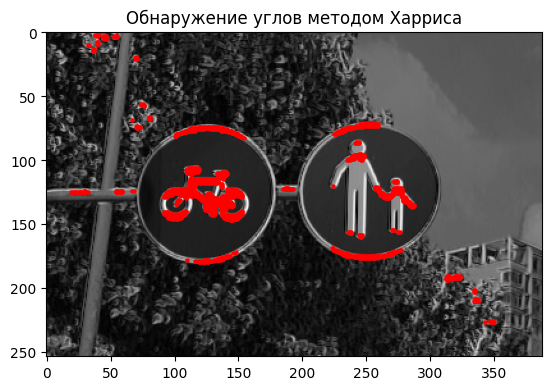

In [45]:
# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
plt.imshow(G, cmap='gray')
plt.scatter(corners[:, 1], corners[:, 0], s=5, c='red')
plt.title('–û–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ —É–≥–ª–æ–≤ –º–µ—Ç–æ–¥–æ–º –•–∞—Ä—Ä–∏—Å–∞')
plt.show()